#  Product-Sales-Analysis

## 1. Objective
Analyze sales data to uncover customer behavior and sales trends.

## 2. Data Acquisition
Load and inspect the dataset to understand its structure.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Order_details(masked).csv')
df.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


## 3. Data Cleaning and Preparation
Convert date columns to datetime format and clean product names.

In [4]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.head()


,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,2021-01-03 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,2021-01-03 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,2021-01-03 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,2021-01-03 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",2021-01-03 10:56:46


In [5]:
print(df.isnull().sum())

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64


In [6]:
df['Product'] = df['Product'].str.strip().str.lower()
df.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,product_75,2021-01-03 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,product_75,2021-01-03 02:04:07
2,PERSON_3,PERSON_3@gmail.com,product_63,2021-01-03 09:10:43
3,PERSON_4,PERSON_4@gmail.com,product_63,2021-01-03 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"product_34,product_86,product_57,product_89",2021-01-03 10:56:46


## 4. Exploratory Data Analysis (EDA)
- Calculate unique and repeat customers
- Identify top products
- Analyze sales trends by day and month

In [7]:
unique_customers = df['Email'].nunique()
print(f'Unique customers: {unique_customers}')

Unique customers: 525


#### Number of repeat customers (customers with more than one purchase)

In [8]:
repeat_customers = df['Email'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].count()
print(f'Repeat customers: {repeat_customers}')

Repeat customers: 47


### Top 10 most purchased products

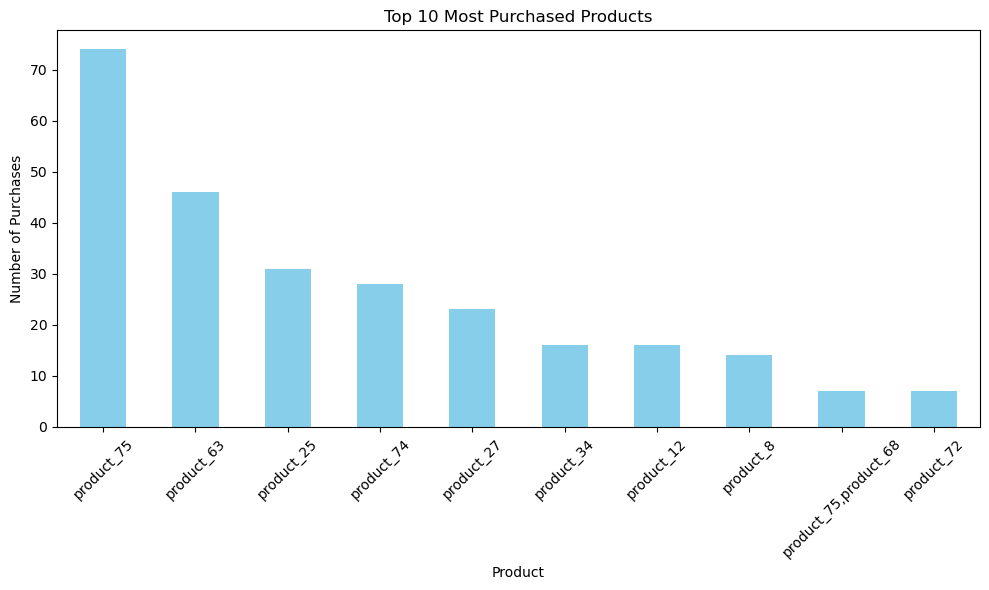

In [9]:
top_products = df['Product'].value_counts().head(10)



plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Daily sales trend

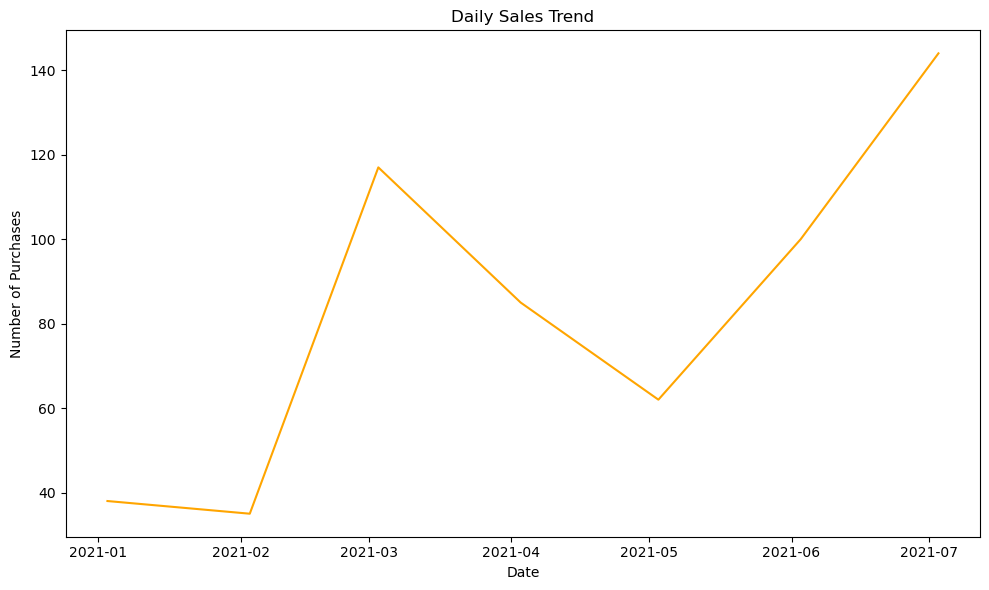

In [10]:

daily_sales = df.groupby(df['Transaction Date'].dt.date).size()


plt.figure(figsize=(10,6))
daily_sales.plot(kind='line', color='orange')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()


### Monthly sales trend

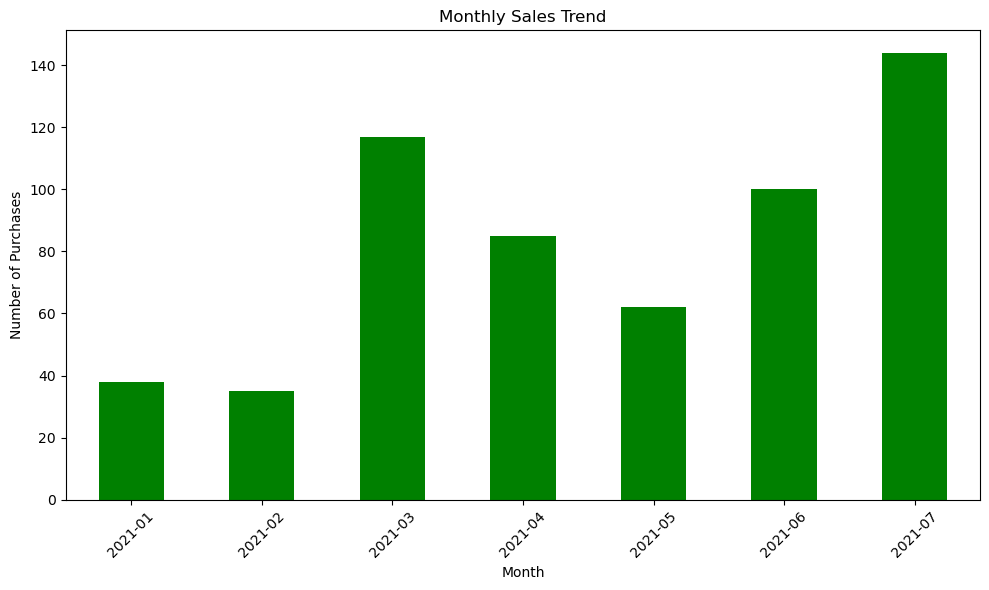

In [11]:
monthly_sales = df.groupby(df['Transaction Date'].dt.to_period('M')).size()


plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Insights and Recommendations
Summarize key findings and suggest next steps.

In [12]:
print("\n--- Summary of Insights ---")
print(f"Total unique products: {df['Product'].nunique()}")
print(f"Top product: {top_products.index[0].title()} with {top_products.iloc[0]} purchases")
print(f"Peak sales day: {daily_sales.idxmax()} with {daily_sales.max()} purchases")


--- Summary of Insights ---
Total unique products: 252
Top product: Product_75 with 74 purchases
Peak sales day: 2021-07-03 with 144 purchases


## 6. Conclusion
Wrap up the analysis and mention potential future improvements.

In [13]:
print("\n--- Recommendations ---")
print("1. Focus marketing efforts on the top products to boost sales further.")
print("2. Investigate peak sales days and plan promotional campaigns accordingly.")
print("3. Encourage repeat customers with loyalty programs to increase sales.")



--- Recommendations ---
1. Focus marketing efforts on the top products to boost sales further.
2. Investigate peak sales days and plan promotional campaigns accordingly.
3. Encourage repeat customers with loyalty programs to increase sales.
